In [343]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [344]:
df = pd.read_csv('fcc-forum-pageviews.csv',
                 parse_dates = ['date'],
                 index_col = 'date')


In [345]:
df.rename(columns={'value' : 'views'}, inplace=True)

In [357]:
df

,views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [346]:
df.isna().sum()

views    0
dtype: int64

In [347]:
df = df[(df['views'] >= df['views'].quantile(0.025)) & (df['views'] <= df['views'].quantile(0.975))]

<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

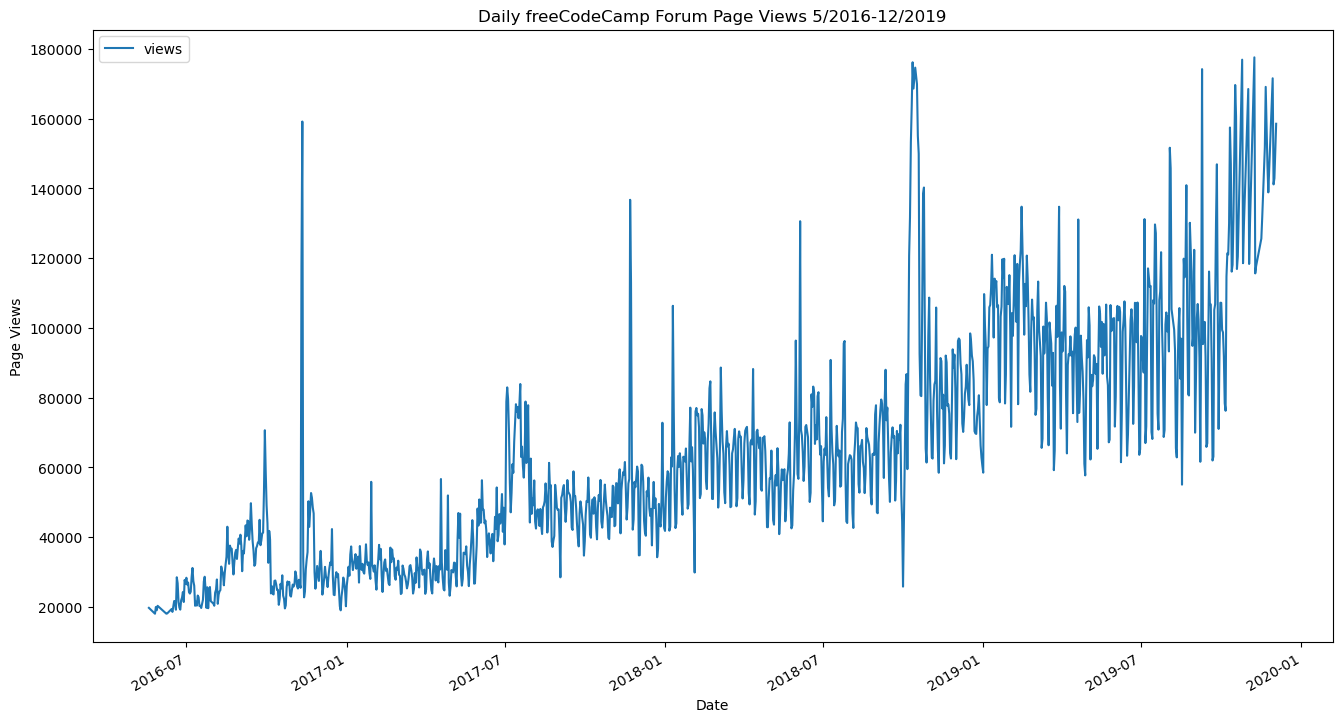

In [348]:
df.plot(kind ='line',
        use_index = True,
        y = 'views',
        xlabel = 'Date',
        ylabel = 'Page Views',
        title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019',
       figsize = (16,9))

In [349]:
df_bar = df.groupby([df.index.year, df.index.month_name()])['views'].mean().unstack()

In [351]:
df_bar = df_bar[calendar.month_name[1:]]
df_bar.columns.names = ['Months']

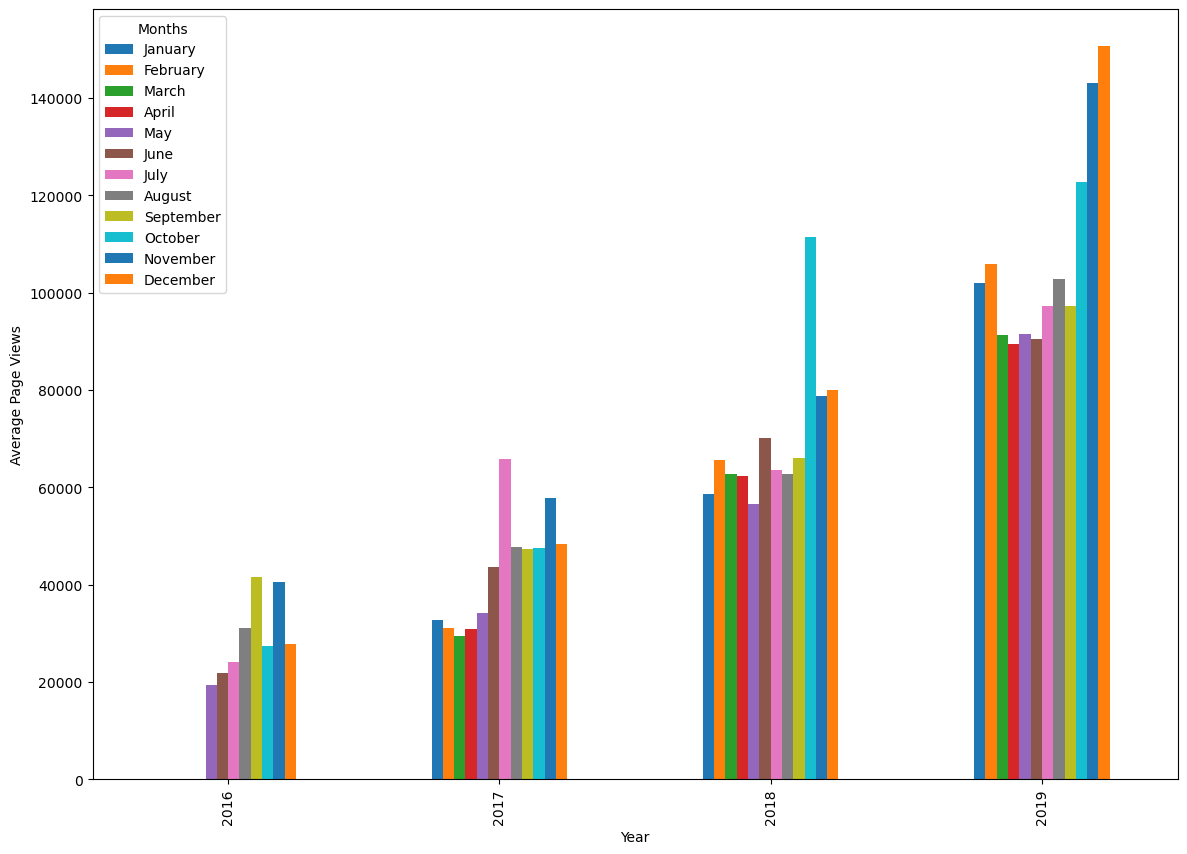

In [353]:
fig = df_bar.plot(kind = 'bar',
                 xlabel = 'Year',
                 ylabel = 'Average Page Views',
                 figsize = (14,10)).get_figure()

In [406]:
df_box = df.copy()
df_box.reset_index(inplace = True)
df_box['Year'] = [i.year for i in df_box.date]
df_box['Month'] = [i.strftime('%b') for i in df_box.date]
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

Text(0, 0.5, 'Page Views')

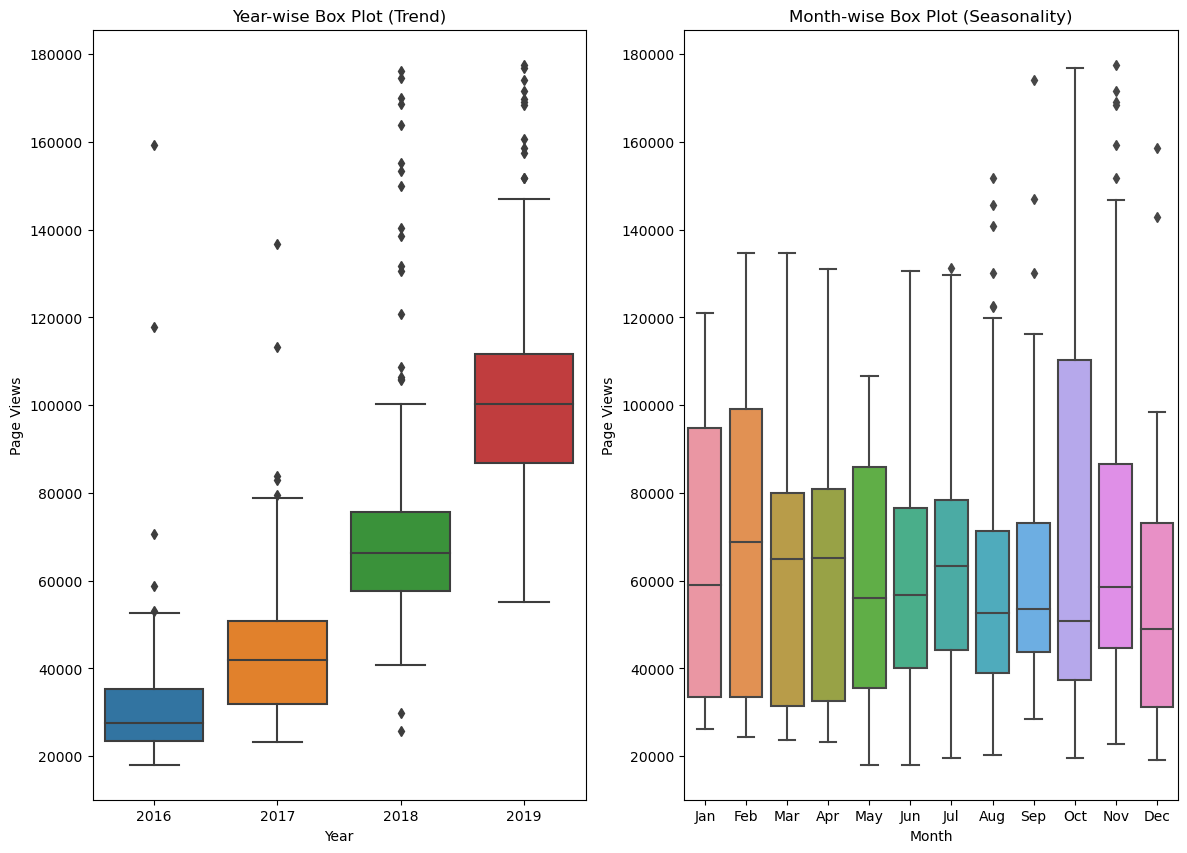

In [408]:
fig, axe = plt.subplots(1, 2, figsize = (14,10))

sns.boxplot(data = df_box,
            x = 'Year',
            y = 'views',
            ax = axe[0]).set_title('Year-wise Box Plot (Trend)')

axe[0].set_xlabel('Year')
axe[0].set_ylabel('Page Views')

sns.boxplot(data = df_box,
            x = 'Month',
            y = 'views',
            order = month_order,
            ax = axe[1]).set_title('Month-wise Box Plot (Seasonality)')

axe[1].set_xlabel('Month')
axe[1].set_ylabel('Page Views')